# Titanic Machine Learning Competition

A simple solution to the Kaggle Titanic Competition:

"*Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die*"


## Set Up

In [53]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt

#Filter unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [54]:
#import csv into pd - training data
train_data = pd.read_csv('train.csv')

#import csv into pd - test data
test_data = pd.read_csv('test.csv')
test_data2 = pd.read_csv('test.csv') #control purposes

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Continous or Discrete?

In [71]:
numerical=[features for features in train_data.columns if train_data[features].dtypes!='O']
numerical.remove('PassengerId')
numerical

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [72]:
discrete=[feature for feature in numerical if len(train_data[feature].unique())<25] #less than 25 unique values
discrete

['Pclass', 'SibSp', 'Parch']

In [73]:
continous=[feature for feature in numerical if feature not in discrete]
continous

['Survived', 'Age', 'Fare']

In [74]:
categorical = [feature for feature in train_data.columns if feature not in numerical]
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [75]:
categorical = cat_feat + discrete_feat
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Pclass', 'SibSp', 'Parch']

#### Numerical Analysis

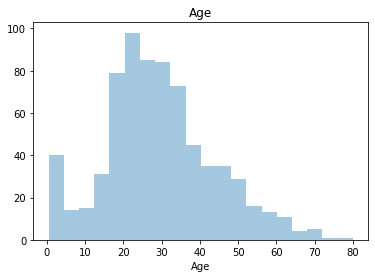

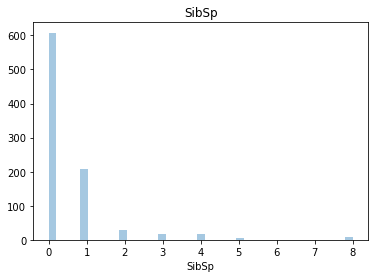

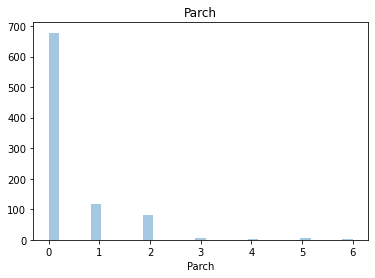

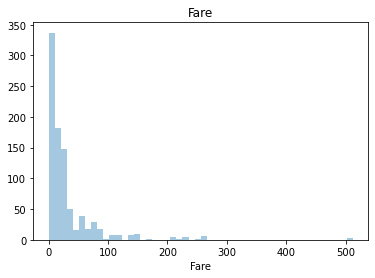

In [18]:
#Set of numerical data
numerical = ['Age','SibSp','Parch','Fare']

#For loop to print histograms for numerical data
for i in numerical:
    sns.distplot(train_data[i].dropna(), kde=False)  
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

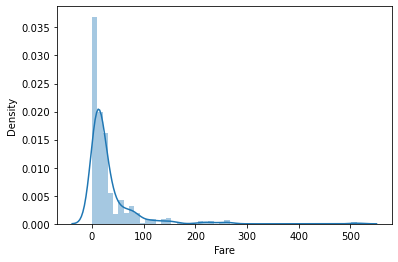

In [19]:
sns.distplot(train_data[i].dropna()) 

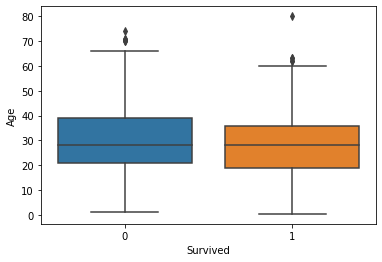

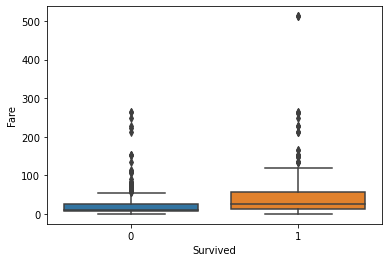

In [64]:
for i in continous_feat:
    sns.boxplot('Survived',i,data=train_data)
    plt.show()

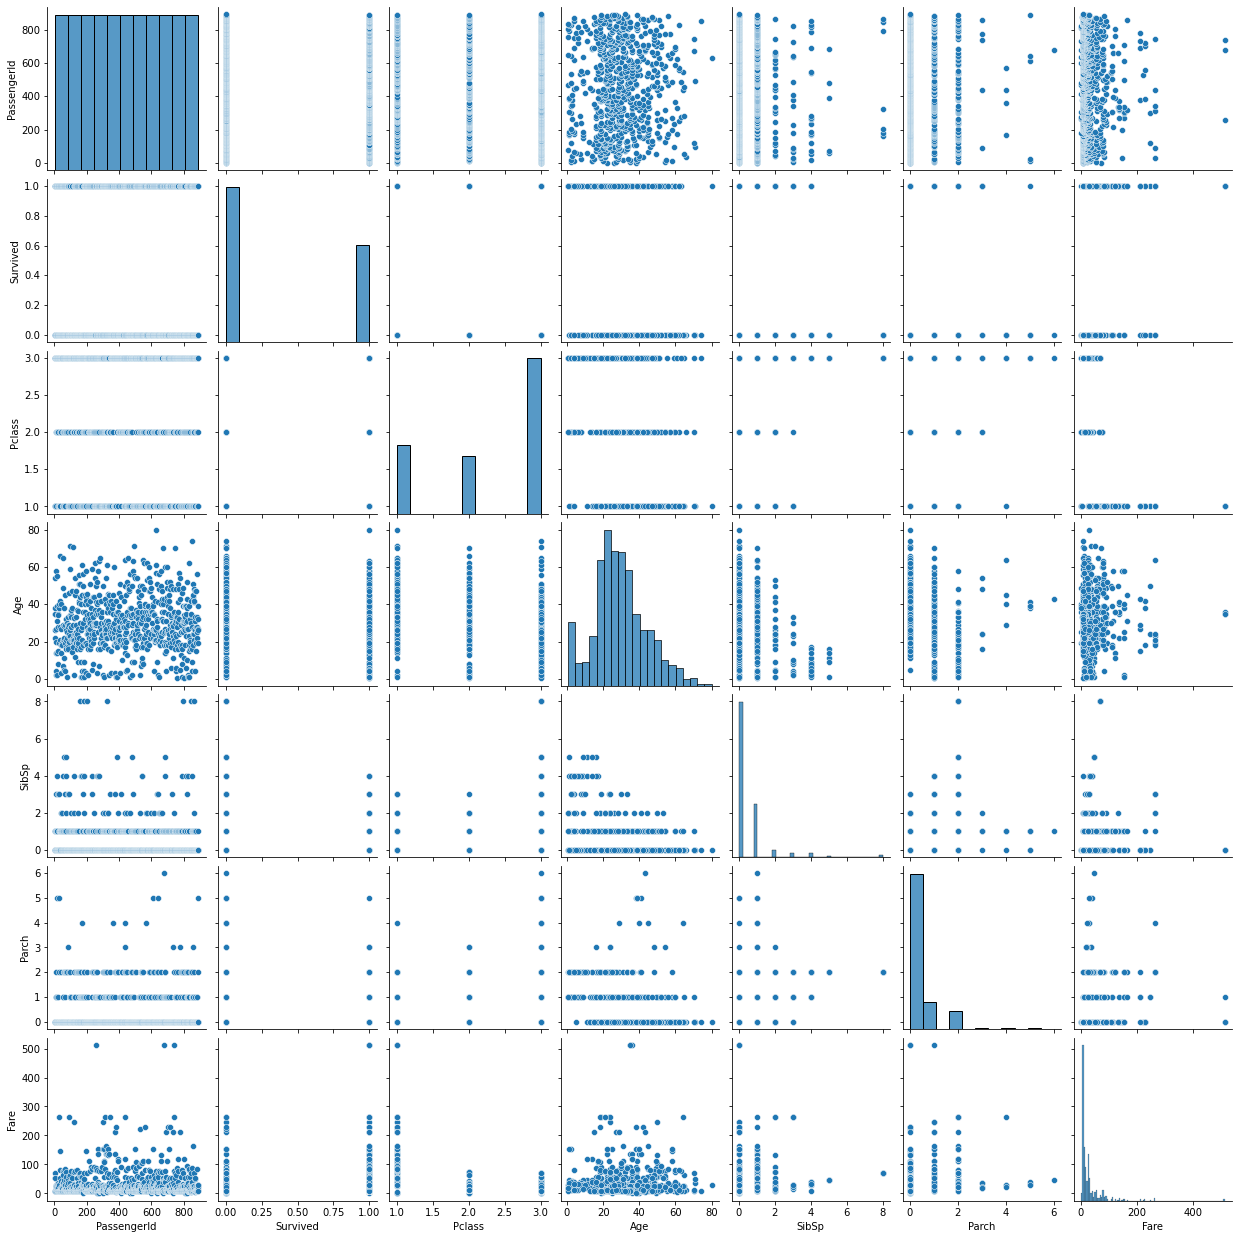

In [21]:
sns.pairplot(train_data)

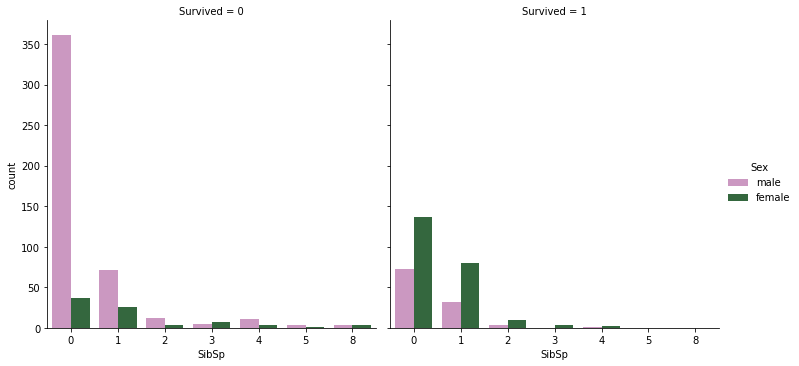

In [22]:
sns.catplot('SibSp',hue='Sex',col='Survived',kind='count',data=train_data,palette='cubehelix_r')

In [12]:
age = pd.cut(train_data['Age'], [0, 18, 80])
display(pd.pivot_table(train_data, index=age, values = 'Survived').style.background_gradient(cmap='Reds'))

,Survived
Age,
"(0, 18]",0.503597
"(18, 80]",0.382609


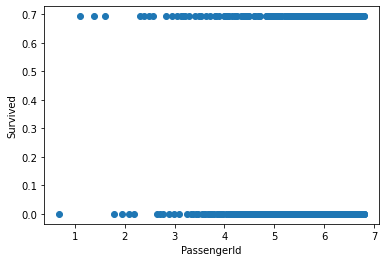

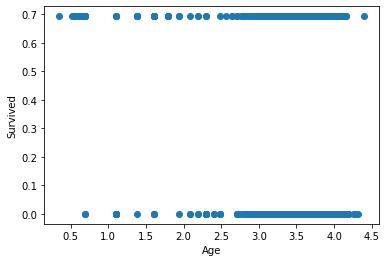

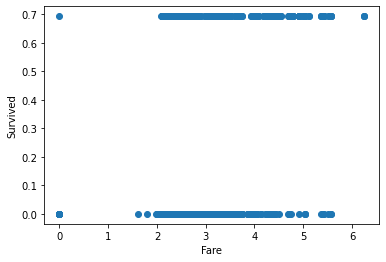

In [51]:
for feature in continous_feat:
    data=train_data.copy()
    data['Survived']=np.log(data['Survived']+1)
    data[feature]=np.log(data[feature]+1)
    plt.scatter(data[feature], data['Survived'])
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.show()
    

#### Categorical Analysis

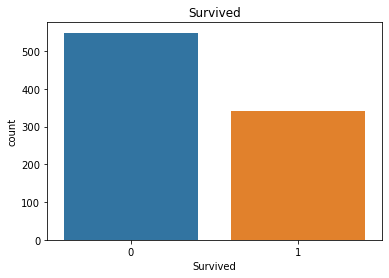

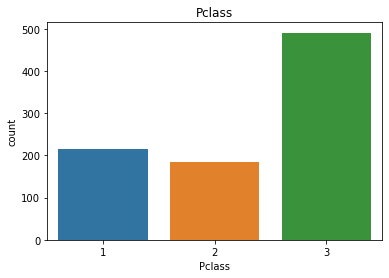

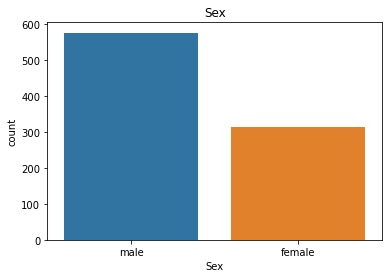

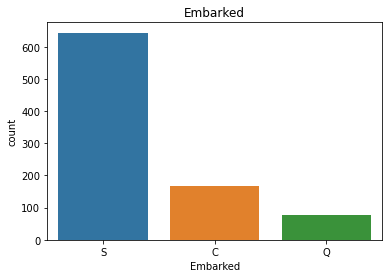

In [31]:
categorical = ['Survived','Pclass','Sex','Embarked']
#Left out 'Ticket','Cabin', too many missing values gets messy

#Easy way of doing count bar charts
for i in categorical:
    sns.countplot(train_data[i], data=train_data).set_title(i)
    plt.show()

In [14]:
for i in categorical:
    if i != 'Survived':
        display(pd.pivot_table(train_data, index=train_data[i], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


,Survived
Sex,
female,0.742038
male,0.188908


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [15]:
train_data.pivot_table('Survived', ['Embarked','Sex'] , 'Pclass').style.background_gradient(cmap='Reds')

In [16]:
#Extract first letter from cabin
train_data['Cabin_letter'] = train_data.Cabin.str.extract('([a-zA-Z])')

In [17]:
train_data['Cabin_letter'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_letter, dtype: int64

In [18]:
 display(pd.pivot_table(train_data, index=train_data['Cabin_letter'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Cabin_letter,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000


In [19]:
#Extract all letters in ticket
train_data['Ticket_letter'] = train_data.Ticket.str.extract('([a-zA-Z]+)')

#new column to mark if ticket is number or has letters in it
train_data['isNumeric'] = train_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [20]:
train_data['Ticket_letter'].value_counts()

PC       60
C        33
A        29
STON     18
SOTON    17
CA       14
S        14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
SO        1
SCO       1
SW        1
Fa        1
Name: Ticket_letter, dtype: int64

In [21]:
train_data['isNumeric'].value_counts()

1    661
0    230
Name: isNumeric, dtype: int64

In [22]:
 display(pd.pivot_table(train_data, index=train_data['Ticket_letter'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Ticket_letter,
A,0.068966
C,0.454545
CA,0.071429
F,0.666667
Fa,0.000000
LINE,0.250000
P,0.500000
PC,0.650000
PP,0.666667


In [23]:
 display(pd.pivot_table(train_data, index=train_data['isNumeric'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
isNumeric,
0,0.382609
1,0.384266


In [24]:
#Extract title from {Name}, regex: extract alphanumeric characters after a comma ',' and before a period '.' , r = raw string

train_data['Title'] = train_data.Name.str.extract(r', (\w+)\.')

In [25]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Sir           1
Jonkheer      1
Capt          1
Lady          1
Don           1
Mme           1
Name: Title, dtype: int64

In [26]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', nan, 'Jonkheer'],
      dtype=object)

In [27]:
 display(pd.pivot_table(train_data, index=train_data['Title'], values ='Survived').style.background_gradient(cmap='Reds'))

,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


## For future reference:

In [41]:
#Groupby examples
train_data.groupby('SibSp')['Survived'].count()

SibSp
-0.475199    606
 0.431350    209
 1.337900     28
 2.244449     16
 3.150998     18
 4.057548      5
 6.777195      7
Name: Survived, dtype: int64

In [42]:
train_data[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)
#mean = survival rate

,Survived
SibSp,
0.431350,0.535885
1.337900,0.464286
-0.475199,0.343234
2.244449,0.250000
3.150998,0.166667
4.057548,0.000000
6.777195,0.000000


In [43]:
#Ratio of men to women survival
Men = train_data[train_data['Sex'] == 'male']['Sex'].count()
survived_men = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]['Sex'].count()
Women = train_data[train_data['Sex'] == 'female']['Sex'].count()
survived_women = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]['Sex'].count()

print('The ratio of survived men : '+ '%' +str(round(100*survived_men / Men, 2)) )
print('The ratio of survived women : '+ '%' +str(round(100*survived_women / Women, 2)) )

The ratio of survived men : %18.89
The ratio of survived women : %74.04


In [44]:
#Mapping
embarkment = {'S': 0, 'C': 1, 'Q': 2}
train_data['embarked_id'] = train_data['Embarked'].map(embarkment)
test_data['embarked_id'] = train_data['Embarked'].map(embarkment)

In [3]:
#binning age
train_data['AgeBands'] = pd.qcut(train_data['Age'], 5)
train_data['AgeBands'].unique()

#Age was scaled before, so this is just gibberish - example of if we wanted to turn age into a categorical feature

[(19.0, 25.0], (31.8, 41.0], (25.0, 31.8], NaN, (41.0, 80.0], (0.419, 19.0]]
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [48]:
#Seperating into age bands
datasets = [train_data, test_data]

for i in datasets:
    
    i.loc[i['Age'] <= 19, 'Age'] = 10
    i.loc[(19 < i['Age'] ) & (i['Age'] <= 25), 'Age' ] = 20
    i.loc[(25.0 < i['Age'] ) & (i['Age'] <= 31.8), 'Age' ] = 30
    i.loc[(31.8 < i['Age'] ) & (i['Age'] <= 41.0), 'Age' ] = 40
    i.loc[(41.0 < i['Age'] ) & (i['Age'] <= 80.0), 'Age' ] = 50
    
    i['Age'] = i.loc[i['Age'].notnull(), 'Age'].astype(int)

OR

In [6]:
bins = [0, 19.0, 31.8, 41.0, 80]
train_data['bin_indices'] = np.digitize(train_data['Age'], bins)
print(train_data['bin_indices'])

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    2
888    5
889    2
890    3
Name: bin_indices, Length: 891, dtype: int64


In [47]:
print(train_data['Age'].unique())
print(test_data['Age'].unique())

[10]
[10]


In [25]:
numerical_feat=[features for features in train_data.columns if train_data[features].dtypes!='O']
print('The number of numerical features are', len(numerical_feat))

The number of numerical features are 7


In [29]:
numerical_feat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

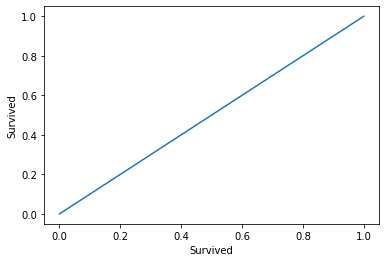

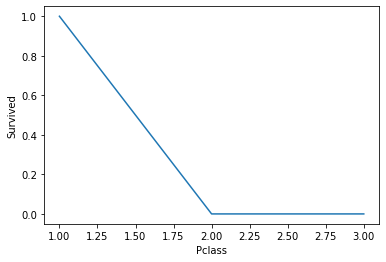

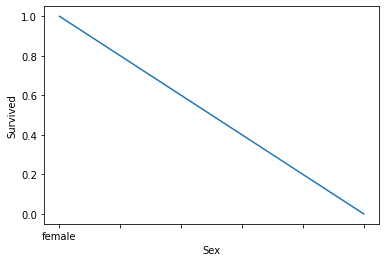

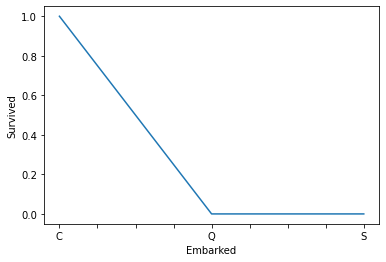

In [39]:
for feature in categorical:
    train_data.groupby(feature)['Survived'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.show()

<AxesSubplot:xlabel='Embarked'>

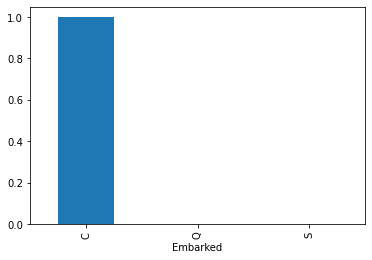

In [40]:
train_data.groupby(feature)['Survived'].median().plot.bar()

In [ ]:
#year_feature=[feature for feature in numerical_feat if 'Yr' in feature or 'Year' in feature]